In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _,filenames in os.walk(r'C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(1).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(10).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(100).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(11).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(12).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(13).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(14).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing\glioma_tumor\image(15).jpg
C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [6]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# FOLDER PATHS

In [7]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))   #joins images in folder
        img = cv2.resize(img,(image_size,image_size))  #scale image to required size(150*150)
        X_train.append(img)                            #puts images
        Y_train.append(i)                              #puts type of tumor image

for i in labels:
    folderPath = os.path.join(r'C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)              #converts array in numpy array
Y_train = np.array(Y_train)

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)    #splits whole data 
X_train.shape                                                  #o/p (no. of train img,size,rgb channel)

(3264, 150, 150, 3)

# TRAIN TEST SPLIT

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# CONVOLUTIONAL NEURAL NETWORK

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 434s 5s/step - loss: 1.9558 - accuracy: 0.2898 - val_loss: 1.3643 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 365s 4s/step - loss: 1.2880 - accuracy: 0.3927 - val_loss: 1.1172 - val_accuracy: 0.5442
Epoch 3/20
83/83 [==============================] - 385s 5s/step - loss: 1.0315 - accuracy: 0.5445 - val_loss: 0.9893 - val_accuracy: 0.5714
Epoch 4/20
83/83 [==============================] - 386s 5s/step - loss: 0.8959 - accuracy: 0.6163 - val_loss: 0.8547 - val_accuracy: 0.5850
Epoch 5/20
83/83 [==============================] - 390s 5s/step - loss: 0.7821 - accuracy: 0.6697 - val_loss: 0.7608 - val_accuracy: 0.6803
Epoch 6/20
83/83 [==============================] - 387s 5s/step - loss: 0.6716 - accuracy: 0.7238 - val_loss: 0.6636 - val_accuracy: 0.7177
Epoch 7/20
83/83 [==============================] - 389s 5s/step - loss: 0.6353 - accuracy: 0.7321 - val_loss: 0.7051 - val_accuracy: 0.7109
Epoch 8/20
83

# DATA VISUALISE

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

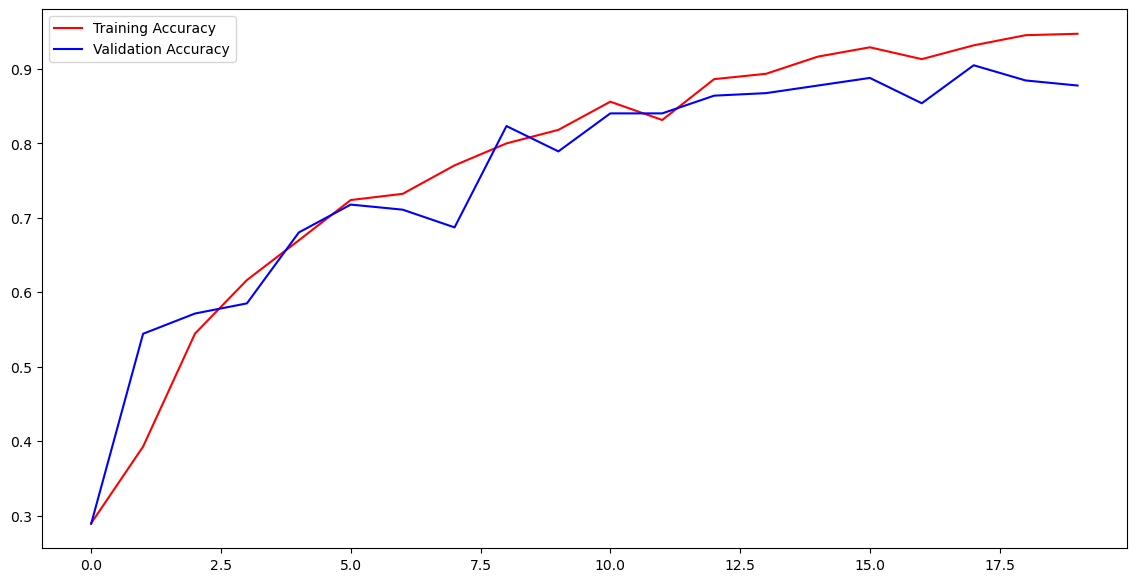

In [16]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

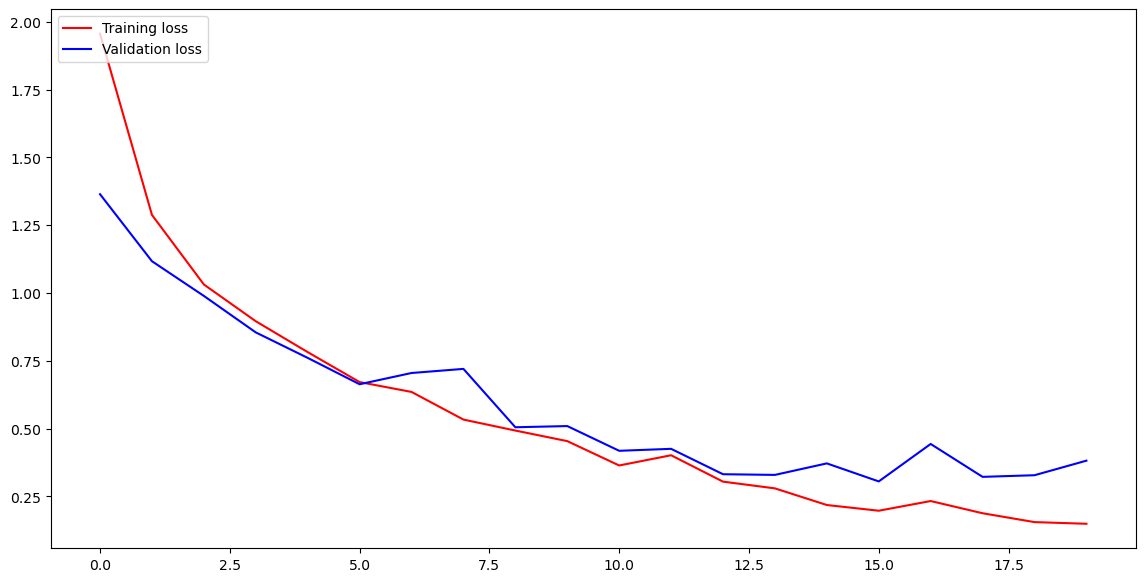

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

# Prediction

In [48]:
img = cv2.imread(r'C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Training\no_tumor\image (9).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [49]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

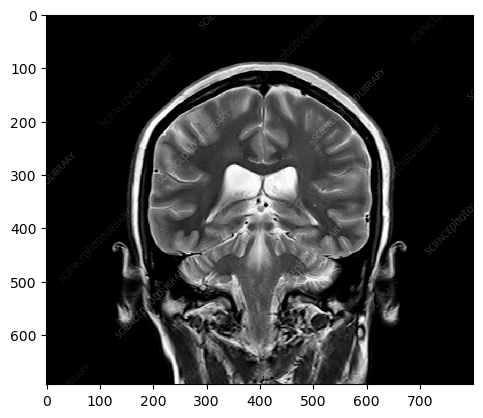

In [50]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\Admin\OneDrive\Desktop\Internship Project\Brain tumor detection project\Training\no_tumor\image (9).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

 TEST MODEL

In [51]:
a=model.predict(img_array)
indices = a.argmax()
print(indices)
if indices==0:
    print("It is Glioma Tumor.")
if indices==1:
    print("It is Meninglioma Tumor.")
if indices==2:
    print("There is absence of Tumor in brain.")
if indices==3:
    print("It is Pituitary Tumor.")

1/1 [==============================] - 0s 94ms/step
2
There is absence of Tumor in brain.
